Plot saved successfully at: D:/OneDrive - The Pennsylvania State University/PhD/1. PhD Research Works/CHIMES_group/1.TLV_Project/Nanofab Fabrication/Ellipsometer/mvm_data/241127/plot-shaded.pdf


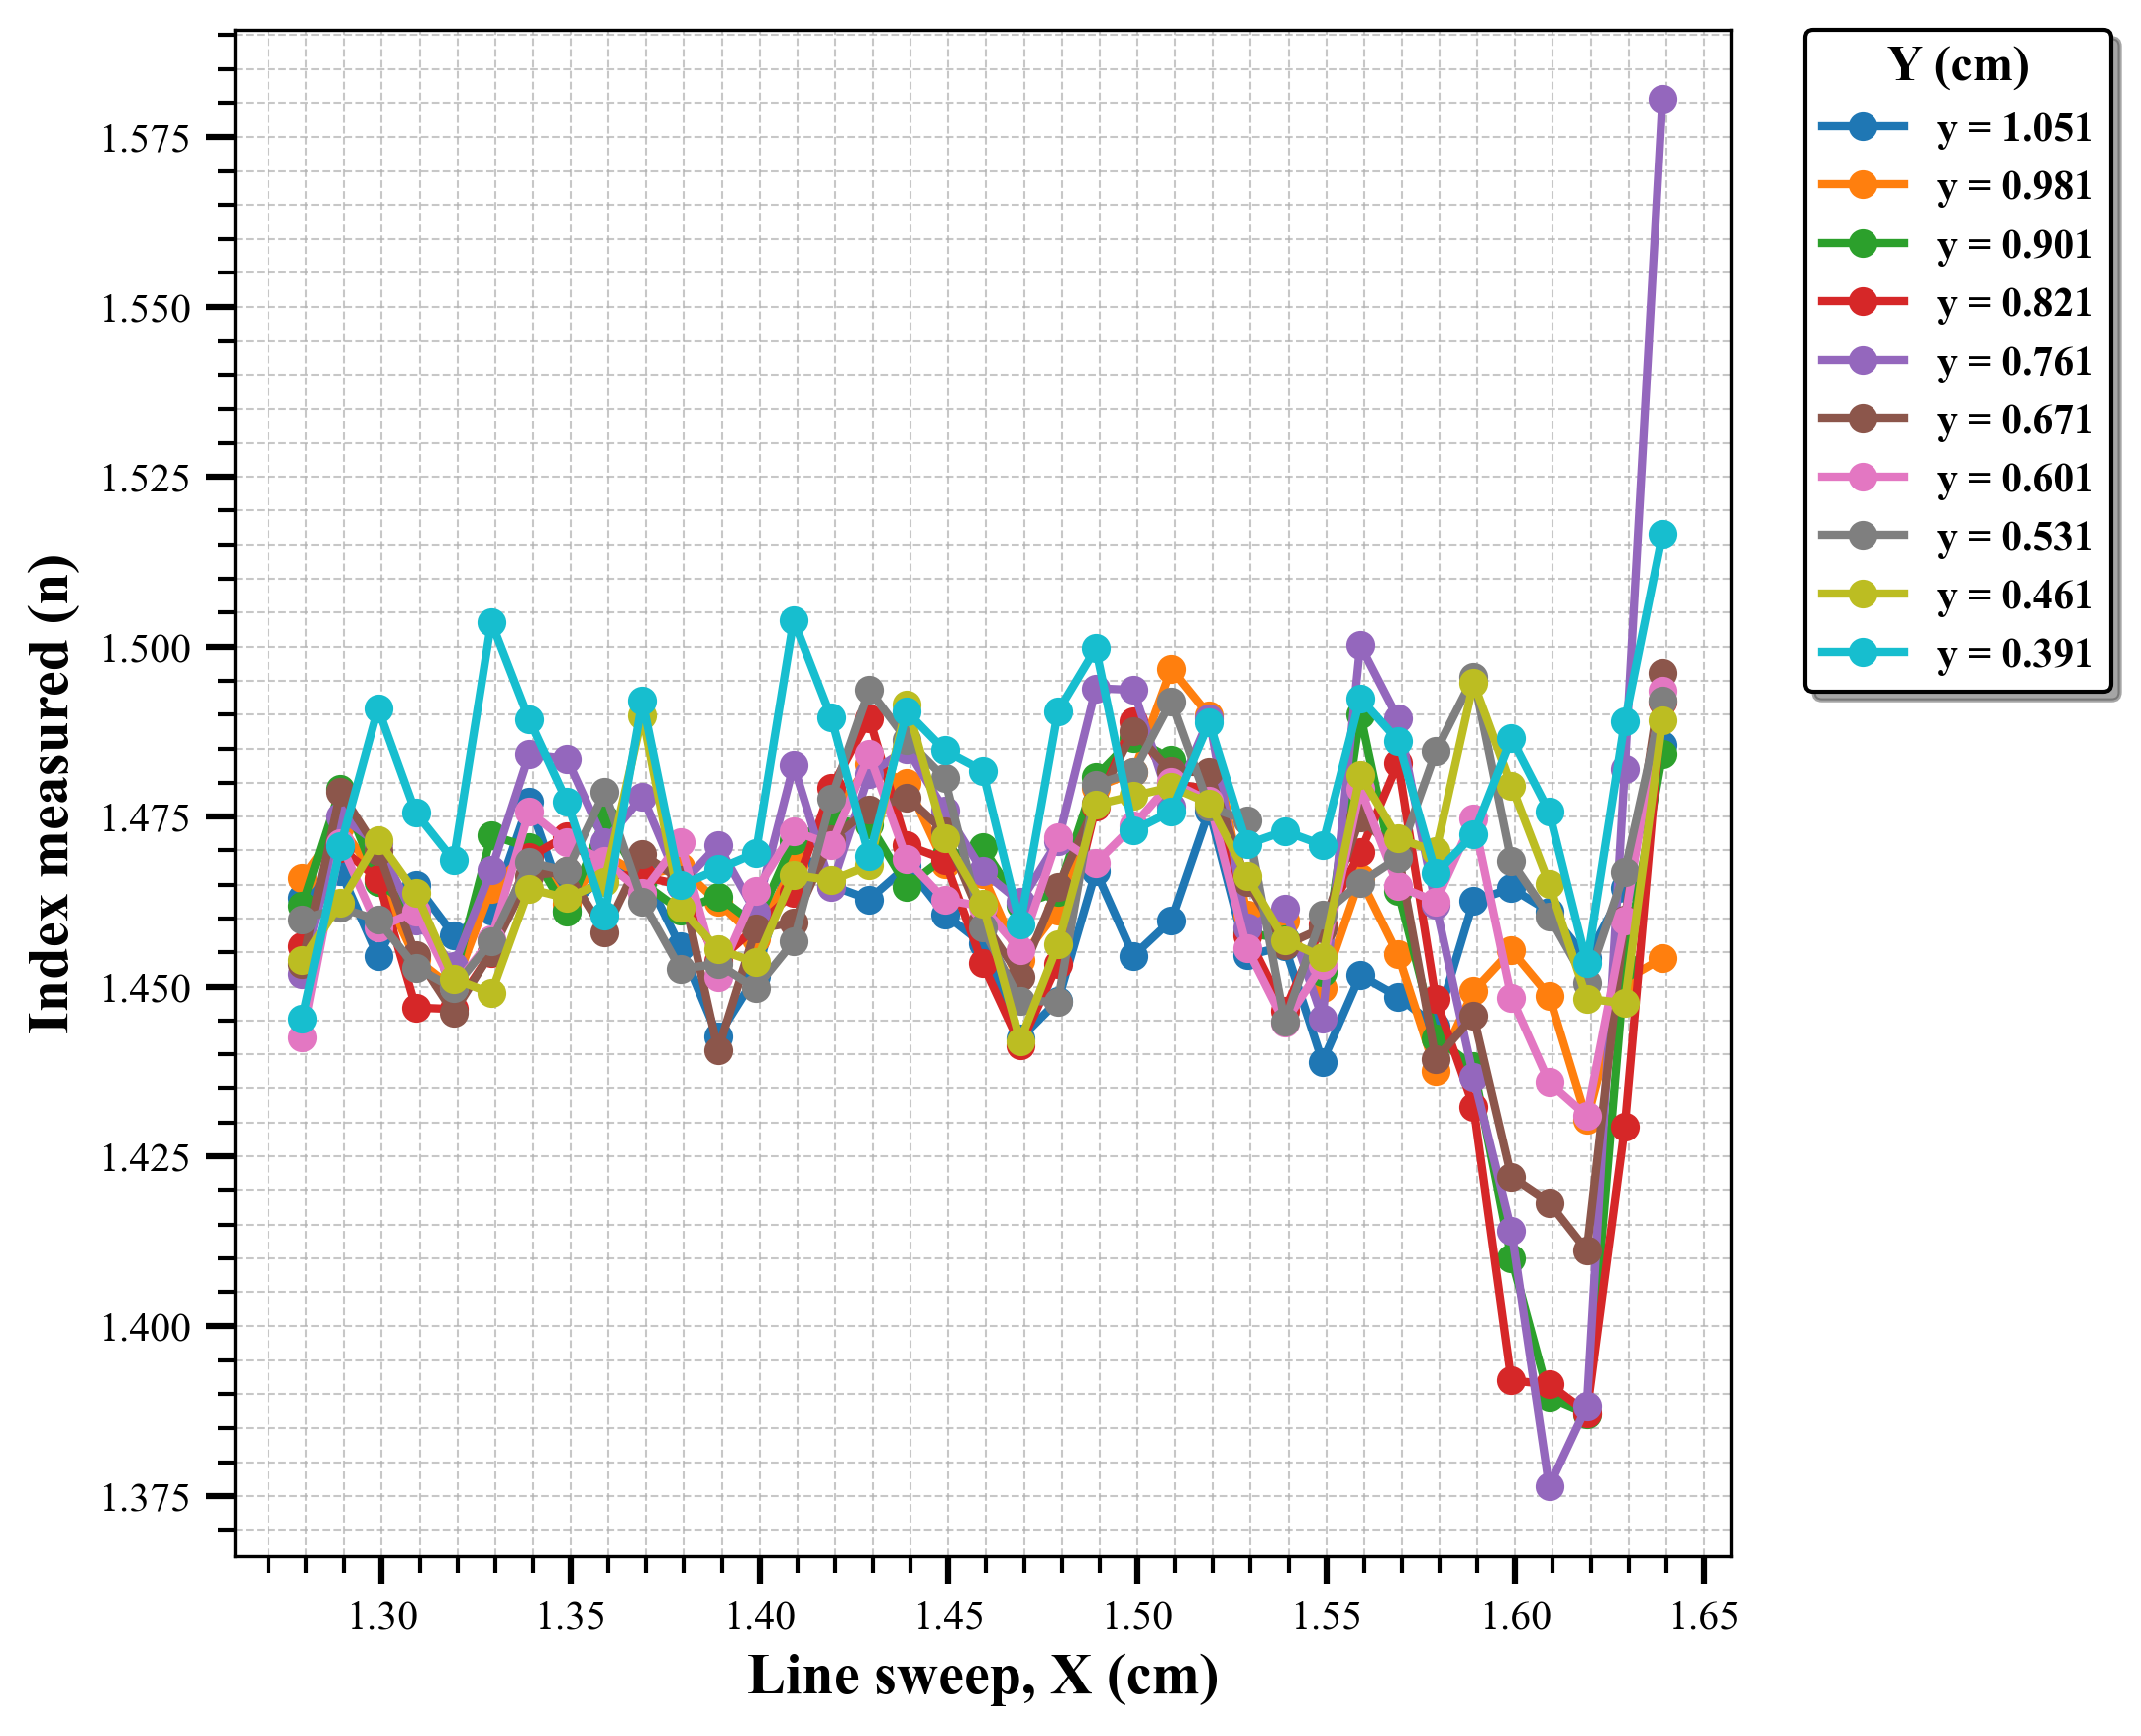

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib import rcParams
from matplotlib.ticker import AutoLocator, AutoMinorLocator
import tkinter as tk
from tkinter import filedialog

# ============================
# 1. Configuration for Fonts and Styles
# ============================

# Set global font to Times New Roman
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 12  # Base font size
rcParams['axes.labelweight'] = 'bold'  # Bold axis labels
rcParams['axes.titlesize'] = 14  # Title font size
rcParams['axes.titleweight'] = 'bold'  # Bold title
rcParams['legend.fontsize'] = 10
rcParams['legend.title_fontsize'] = 12
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['lines.linewidth'] = 2  # Line width
rcParams['lines.markersize'] = 6  # Marker size
rcParams['figure.figsize'] = (10, 6)  # Figure size in inches
rcParams['figure.dpi'] = 300  # Resolution
rcParams['axes.unicode_minus'] = False  # Ensure minus signs are rendered correctly

# ============================
# 2. Path Configuration
# ============================

# Path to your Excel file directory
file_path = r"D:\OneDrive - The Pennsylvania State University\PhD\1. PhD Research Works\CHIMES_group\1.TLV_Project\Nanofab Fabrication\Ellipsometer\mvm_data\241127"

# Name of your Excel file (ensure the extension is correct)
file_name = "data_plotting.xlsx"  # Replace with your actual file name if different
full_path = os.path.join(file_path, file_name)

# ============================
# 3. Data Reading and Processing
# ============================

# Read the Excel file and skip the first two rows
try:
    df = pd.read_excel(full_path, skiprows=2)
except FileNotFoundError:
    print(f"Error: The file {full_path} was not found.")
    exit(1)
except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")
    exit(1)

# Number of datasets
num_datasets = 10

# ============================
# 4. Plot Initialization
# ============================

fig, ax = plt.subplots()

# ============================
# 5. Plotting Loop
# ============================

for i in range(num_datasets):
    # Calculate the starting column index for each dataset
    col_start = i * 3  # Zero-based indexing (0, 3, 6, ...)
    
    # Ensure that there are enough columns in the dataframe
    if col_start + 2 >= df.shape[1]:
        print(f"Warning: Dataset {i+1} does not have enough columns. Skipping.")
        continue
    
    # Read x, y_values, z from the dataset
    x = df.iloc[:, col_start]
    y_values = df.iloc[:, col_start + 1]
    z = df.iloc[:, col_start + 2]
    
    # Ensure x and z are numeric
    x = pd.to_numeric(x, errors='coerce')
    z = pd.to_numeric(z, errors='coerce')
    
    # Check if y_values are constant
    if y_values.nunique() != 1:
        print(f"Warning: y-values in dataset {i+1} are not constant.")
    
    # Since y is constant, take the first value
    y = y_values.iloc[0]
    
    # Plot z vs x with y in the legend
    ax.plot(x, z, label=f'y = {y}', marker='o')  # Marker is optional

# ============================
# 6. Plot Customization
# ============================

# Set plot labels and title with Times New Roman Bold
ax.set_xlabel('Line sweep, X (cm)', fontsize=14, fontweight='bold')
ax.set_ylabel('Index measured (n)', fontsize=14, fontweight='bold')
# ax.set_title('Plot of Index (n) vs X (cm) for Different Y (cm)', fontsize=14, fontweight='bold')

# Customize X-axis ticks using AutoLocator and AutoMinorLocator
ax.xaxis.set_major_locator(AutoLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='x', which='major', length=7, width=1.5)
ax.tick_params(axis='x', which='minor', length=4, width=1)

# Customize Y-axis ticks using AutoLocator and AutoMinorLocator
ax.yaxis.set_major_locator(AutoLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='y', which='major', length=7, width=1.5)
ax.tick_params(axis='y', which='minor', length=4, width=1)

# Enable grid with customization
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# ============================
# 7. Legend Customization
# ============================

# Place the legend outside of the plot
# Adjust bbox_to_anchor and loc as needed
legend = ax.legend(title='Y (cm)',
                   bbox_to_anchor=(1.05, 1),
                   loc='upper left',
                   borderaxespad=0.,
                   fontsize=10,  # Legend font size
                   title_fontsize=12,  # Legend title font size
                   frameon=True,  # Add a frame around the legend
                   shadow=True,  # Add a shadow for depth
                   facecolor='white',  # Legend background color
                   edgecolor='black')  # Legend border color

# Optionally, customize legend text properties
for text in legend.get_texts():
    text.set_fontsize(10)        # Set font size
    text.set_fontweight('bold')  # Set font weight

# Optionally, customize the legend title
legend.get_title().set_fontsize(12)
legend.get_title().set_fontweight('bold')

# ============================
# 8. Layout Adjustment
# ============================

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.75, 1])  # Leave space on the right for the legend

# ============================
# 9. Saving the Plot with Save Dialog
# ============================

# Initialize Tkinter root (hidden)
root = tk.Tk()
root.withdraw()  # Hide the main window

# Prompt the user to select save location and file name
file_types = [("PNG Image", "*.png"), ("PDF Document", "*.pdf"), ("All Files", "*.*")]
output_path = filedialog.asksaveasfilename(
    title="Save Plot As",
    initialdir=file_path,
    defaultextension=".png",
    filetypes=file_types
)

# Check if the user provided a file path
if output_path:
    # Save the plot
    plt.savefig(output_path, dpi=600, bbox_inches='tight')
    print(f"Plot saved successfully at: {output_path}")
else:
    print("Save operation cancelled. Plot was not saved.")

# ============================
# 10. Display the Plot
# ============================

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib import rcParams
from matplotlib.ticker import AutoLocator, AutoMinorLocator

# ============================
# 1. Configuration for Fonts and Styles
# ============================

# Set global font to Times New Roman
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 12  # Base font size
rcParams['axes.labelweight'] = 'bold'  # Bold axis labels
rcParams['axes.titlesize'] = 14  # Title font size
rcParams['axes.titleweight'] = 'bold'  # Bold title
rcParams['legend.fontsize'] = 10  # Legend font size
rcParams['legend.title_fontsize'] = 12  # Legend title font size
rcParams['xtick.labelsize'] = 10  # X-axis tick label size
rcParams['ytick.labelsize'] = 10  # Y-axis tick label size
rcParams['lines.linewidth'] = 2  # Line width
rcParams['lines.markersize'] = 6  # Marker size
rcParams['figure.figsize'] = (10, 6)  # Figure size in inches
rcParams['figure.dpi'] = 300  # Resolution
rcParams['axes.unicode_minus'] = False  # Ensure minus signs are rendered correctly

# ============================
# 2. Path Configuration
# ============================

# Path to your Excel file directory
file_path = r"D:\OneDrive - The Pennsylvania State University\PhD\1. PhD Research Works\CHIMES_group\1.TLV_Project\Nanofab Fabrication\Ellipsometer\mvm_data\241127"

# Name of your Excel file (ensure the extension is correct)
file_name = "data_plotting.xlsx"  # Replace with your actual file name if different
full_path = os.path.join(file_path, file_name)

# ============================
# 3. Data Reading and Processing
# ============================

# Read the Excel file and skip the first two rows
try:
    df = pd.read_excel(full_path, skiprows=2)
except FileNotFoundError:
    print(f"Error: The file {full_path} was not found.")
    exit(1)
except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")
    exit(1)

# Number of datasets
num_datasets = 10

# ============================
# 4. Plot Initialization
# ============================

fig, ax = plt.subplots()

# ============================
# 5. Plotting Loop
# ============================

for i in range(num_datasets):
    # Calculate the starting column index for each dataset
    col_start = i * 3  # Zero-based indexing (0, 3, 6, ...)
    
    # Ensure that there are enough columns in the dataframe
    if col_start + 2 >= df.shape[1]:
        print(f"Warning: Dataset {i+1} does not have enough columns. Skipping.")
        continue
    
    # Read x, y_values, z from the dataset
    x = df.iloc[:, col_start]
    y_values = df.iloc[:, col_start + 1]
    z = df.iloc[:, col_start + 2]
    
    # Check if y_values are constant
    if y_values.nunique() != 1:
        print(f"Warning: y-values in dataset {i+1} are not constant.")
    
    # Since y is constant, take the first value
    y = y_values.iloc[0]
    
    # Plot z vs x with y in the legend
    ax.plot(x, z, label=f'y = {y}', marker='o')  # Marker is optional

# ============================
# 6. Plot Customization
# ============================

# Set plot labels and title with Times New Roman Bold
ax.set_xlabel('Line sweep, X (cm)', fontsize=14, fontweight='bold')
ax.set_ylabel('Index measured (n)', fontsize=14, fontweight='bold')
#ax.set_title('Plot of index (n) vs x (cm) for different line scan y (cm)', fontsize=14, fontweight='bold')

# Customize X-axis ticks using AutoLocator and AutoMinorLocator
ax.xaxis.set_major_locator(AutoLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='x', which='major', length=7, width=1.5)
ax.tick_params(axis='x', which='minor', length=4, width=1)

# Customize Y-axis ticks using AutoLocator and AutoMinorLocator
ax.yaxis.set_major_locator(AutoLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='y', which='major', length=7, width=1.5)
ax.tick_params(axis='y', which='minor', length=4, width=1)

# Enable grid with customization
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# ============================
# 7. Legend Customization
# ============================

# Place the legend outside of the plot
# Adjust bbox_to_anchor and loc as needed
legend = ax.legend(title='y (cm)',
                   bbox_to_anchor=(1.05, 1),
                   loc='upper left',
                   borderaxespad=0.,
                   fontsize=10,  # Legend font size
                   title_fontsize=12,  # Legend title font size
                   frameon=True,  # Add a frame around the legend
                   shadow=True,  # Add a shadow for depth
                   facecolor='white',  # Legend background color
                   edgecolor='black')  # Legend border color

# Optionally, customize legend text properties
for text in legend.get_texts():
    text.set_fontsize(10)      # Set font size
    text.set_fontweight('bold')  # Set font weight

# Optionally, customize the legend title
legend.get_title().set_fontsize(12)
legend.get_title().set_fontweight('bold')

# ============================
# 8. Layout Adjustment
# ============================

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.75, 1])  # Leave space on the right for the legend

# ============================
# 9. Saving the Plot
# ============================

# Define output file names
output_file_png = 'plot-shaded.png'
output_file_pdf = 'plot-shaded.pdf'  # Vector format suitable for publications

# Full paths
output_path_png = os.path.join(file_path, output_file_png)
output_path_pdf = os.path.join(file_path, output_file_pdf)

# Save the plot
plt.savefig(output_path_png, dpi=300, bbox_inches='tight')
plt.savefig(output_path_pdf, dpi=300, bbox_inches='tight')

# ============================
# 10. Display the Plot
# ============================

plt.show()
